In [2]:
import pandas as pd

data = pd.read_csv(r'C:\Users\warun\Documents\GitHub\Neural_Network_Scratch\clean_weather_new.csv')

data


,tmax,tmin,rain,tmax_tomorrow
0,60.0,35.0,0.0,52.0
1,52.0,39.0,0.0,52.0
2,52.0,35.0,0.0,53.0
3,53.0,36.0,0.0,52.0
4,52.0,35.0,0.0,50.0
...,...,...,...,...
13504,62.0,35.0,0.0,67.0
13505,67.0,38.0,0.0,66.0
13506,66.0,41.0,0.0,70.0
13507,70.0,39.0,0.0,62.0


<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

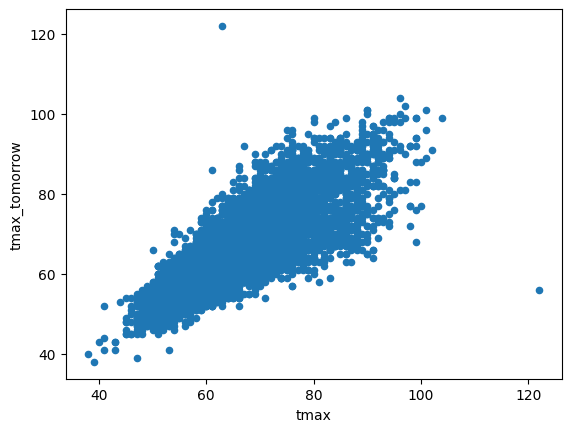

In [3]:
# applying ffill() method to fill the missing values
data=data.ffill()
data.plot.scatter("tmax","tmax_tomorrow")

In [4]:
# check the correlation and coefficients
data.corr()

,tmax,tmin,rain,tmax_tomorrow
tmax,1.000000,0.615604,-0.219941,0.818561
tmin,0.615604,1.000000,-0.019546,0.585572
rain,-0.219941,-0.019546,1.000000,-0.211799
tmax_tomorrow,0.818561,0.585572,-0.211799,1.000000


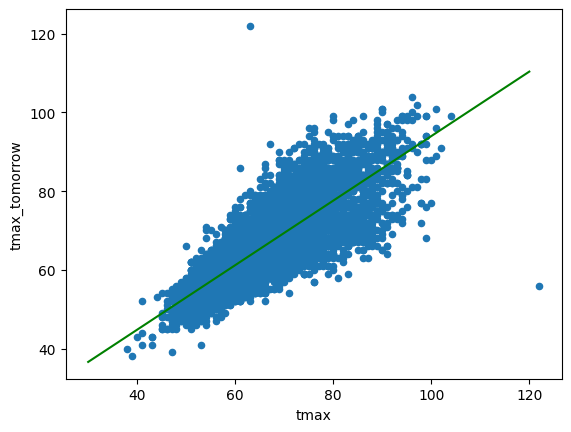

In [5]:
import matplotlib.pyplot as plt
data.plot.scatter("tmax","tmax_tomorrow")
prediction = lambda x, w1=.82, b=11.99: x*w1+b
plt.plot([30, 120], [prediction(30),prediction(120)], 'green')

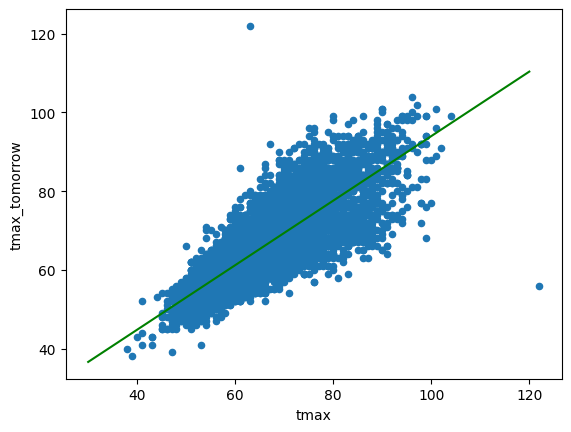

In [13]:
data.plot.scatter("tmax","tmax_tomorrow")
def prediction(x, w1=0.82, b=11.99):
    return x * w1 + b
plt.plot([30, 120], [prediction(30),prediction(120)], 'green')

In [19]:
import numpy as np

def mse(actual, predcted):
    return np.mean((actual-predcted) ** 2)

print('MSE is ',mse    (data["tmax_tomorrow"], prediction(data["tmax"]) ))

#Adding weight and bias to MSE
print('MSE is with biase and weight ',mse    (data["tmax_tomorrow"], prediction(data["tmax"], .82, 13)))
    

MSE is  22.897335324598416
MSE is with biase and weight  24.118285439336727


In here Linear regression doesn't have capacity for handling, because this has more complexsity, we have to use non-linear regression algorithm

Now consider how non linear component looks like

In [22]:
tmax_bins=pd.cut(data["tmax"], 25)
tmax_bins

0        (58.16, 61.52]
1         (51.44, 54.8]
2         (51.44, 54.8]
3         (51.44, 54.8]
4         (51.44, 54.8]
              ...      
13504    (61.52, 64.88]
13505    (64.88, 68.24]
13506    (64.88, 68.24]
13507     (68.24, 71.6]
13508    (61.52, 64.88]
Name: tmax, Length: 13509, dtype: category
Categories (25, interval[float64, right]): [(37.916, 41.36] < (41.36, 44.72] < (44.72, 48.08] < (48.08, 51.44] ... (108.56, 111.92] < (111.92, 115.28] < (115.28, 118.64] < (118.64, 122.0]]

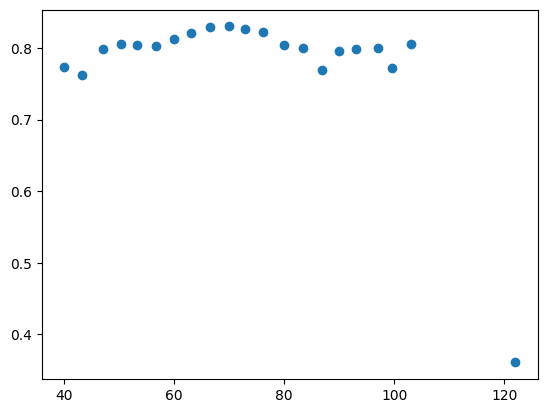

In [25]:
# Cut our tmax range into 25 bins
# tmax_bins = pd.cut(data["tmax"], 25)

# Calculate the average ratio between tmax_tomorrow and tmax in each bin
ratios = (data["tmax_tomorrow"] - 11.99 )/ data["tmax"]
binned_ratio = ratios.groupby(tmax_bins).mean()

# Calculate the average tmax in each bin
binned_tmax = data["tmax"].groupby(tmax_bins).mean()

# Graph the tmax values versus the ratios
plt.scatter(binned_tmax, binned_ratio)